In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go

In [ ]:
df= pd.read_excel('/content/Skills_dataset.xlsx')

In [ ]:
df.shape

(25973, 21)

In [ ]:
df.head()

Timestamp_in_seconds     Q1   Q2         Q3                Q4  \
0                   910  50-54  Man      India  Bachelors degree   
1                   784  50-54  Man  Indonesia    Masters degree   
2                   924  22-24  Man   Pakistan    Masters degree   
3                   575  45-49  Man     Mexico   Doctoral degree   
4                   781  45-49  Man      India   Doctoral degree   

                        Q5          Q6      Q7  \
0                    Other  5-10 years  Python   
1  Program/Project Manager   20+ years  Python   
2        Software Engineer   1-3 years  Python   
3       Research Scientist   20+ years  Python   
4                    Other   < 1 years  Python   

                                                  Q8                  Q9  ...  \
0                                           A laptop           2-5 times  ...   
1  A cloud computing platform (AWS, Azure, GCP, h...               Never  ...   
2                                           A laptop               Never  ...   
3  A cloud computing platform (AWS, Azure, GCP, h...  More than 25 times  ...   
4  A cloud computing platform (AWS, Azure, GCP, h...               Never  ...   

                         Q11                   Q12                  Q13  \
0  Manufacturing/Fabrication      50-249 employees  2023-04-03 00:00:00   
1  Manufacturing/Fabrication  1000-9,999 employees  2023-02-01 00:00:00   
2        Academics/Education  1000-9,999 employees                    0   
3        Academics/Education  1000-9,999 employees                    0   
4        Academics/Education      50-249 employees  2023-09-05 00:00:00   

                                                 Q14            Q15  \
0                      No (we do not use ML methods)  25,000-29,999   
1  We are exploring ML methods (and may one day p...  60,000-69,999   
2                                      I do not know         $0-999   
3                                      I do not know  30,000-39,999   
4  We use ML methods for generating insights (but...  30,000-39,999   

            Q16  Q17     Q18  Q19  \
0     $100-$999  NaN     NaN  NaN   
1     $0 ($USD)  NaN     NaN  NaN   
2     $0 ($USD)  NaN  MySQL   NaN   
3     $0 ($USD)  NaN     NaN  NaN   
4  $1000-$9,999  NaN     NaN  NaN   

                                                 Q20  
0  Local development environments (RStudio, Jupyt...  
1    Advanced statistical software (SPSS, SAS, etc.)  
2  Basic statistical software (Microsoft Excel, G...  
3  Local development environments (RStudio, Jupyt...  
4  Local development environments (RStudio, Jupyt...  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp_in_seconds  25973 non-null  int64 
 1   Q1                    25973 non-null  object
 2   Q2                    25973 non-null  object
 3   Q3                    25973 non-null  object
 4   Q4                    25973 non-null  object
 5   Q5                    25973 non-null  object
 6   Q6                    25973 non-null  object
 7   Q7                    24940 non-null  object
 8   Q8                    24720 non-null  object
 9   Q9                    24403 non-null  object
 10  Q10                   23754 non-null  object
 11  Q11                   16325 non-null  object
 12  Q12                   16251 non-null  object
 13  Q13                   16126 non-null  object
 14  Q14                   15952 non-null  object
 15  Q15                   15391 non-null

In [ ]:
df.dtypes

Timestamp_in_seconds     int64
Q1                      object
Q2                      object
Q3                      object
Q4                      object
Q5                      object
Q6                      object
Q7                      object
Q8                      object
Q9                      object
Q10                     object
Q11                     object
Q12                     object
Q13                     object
Q14                     object
Q15                     object
Q16                     object
Q17                     object
Q18                     object
Q19                     object
Q20                     object
dtype: object

Data Cleaning

In [ ]:
null_cells= df.isnull()

In [ ]:
null_cells

Timestamp_in_seconds     Q1     Q2     Q3     Q4     Q5     Q6     Q7  \
0                     False  False  False  False  False  False  False  False   
1                     False  False  False  False  False  False  False  False   
2                     False  False  False  False  False  False  False  False   
3                     False  False  False  False  False  False  False  False   
4                     False  False  False  False  False  False  False  False   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
25968                 False  False  False  False  False  False  False  False   
25969                 False  False  False  False  False  False  False  False   
25970                 False  False  False  False  False  False  False   True   
25971                 False  False  False  False  False  False  False  False   
25972                 False  False  False  False  False  False  False   True   

          Q8     Q9  ...    Q11    Q12    Q13    Q14    Q15    Q16    Q17  \
0      False  False  ...  False  False  False  False  False  False   True   
1      False  False  ...  False  False  False  False  False  False   True   
2      False  False  ...  False  False  False  False  False  False   True   
3      False  False  ...  False  False  False  False  False  False   True   
4      False  False  ...  False  False  False  False  False  False   True   
...      ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
25968  False  False  ...  False  False  False  False  False  False  False   
25969  False  False  ...   True   True   True   True   True   True   True   
25970   True   True  ...  False  False  False  False  False  False   True   
25971  False  False  ...  False  False  False  False   True   True   True   
25972   True   True  ...  False  False  False  False  False  False   True   

         Q18   Q19    Q20  
0       True  True  False  
1       True  True  False  
2      False  True  False  
3       True  True  False  
4       True  True  False  
...      ...   ...    ...  
25968  False  True  False  
25969   True  True   True  
25970   True  True  False  
25971   True  True   True  
25972   True  True  False  

[25973 rows x 21 columns]

In [ ]:
null_cells.sum()

Timestamp_in_seconds        0
Q1                          0
Q2                          0
Q3                          0
Q4                          0
Q5                          0
Q6                          0
Q7                       1033
Q8                       1253
Q9                       1570
Q10                      2219
Q11                      9648
Q12                      9722
Q13                      9847
Q14                     10021
Q15                     10582
Q16                     10790
Q17                     22846
Q18                     21317
Q19                     23736
Q20                      7484
dtype: int64

In [ ]:
#the perrcentages of the missing values in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

In [ ]:
pct_missing_df

col  pct_missing
0   Timestamp_in_seconds     0.000000
1                     Q1     0.000000
2                     Q2     0.000000
3                     Q3     0.000000
4                     Q4     0.000000
5                     Q5     0.000000
6                     Q6     0.000000
7                     Q7     3.977207
8                     Q8     4.824241
9                     Q9     6.044739
10                   Q10     8.543487
11                   Q11    37.146267
12                   Q12    37.431179
13                   Q13    37.912448
14                   Q14    38.582374
15                   Q15    40.742309
16                   Q16    41.543141
17                   Q17    87.960574
18                   Q18    82.073692
19                   Q19    91.387210
20                   Q20    28.814538

In [ ]:
import pandas as pd
import plotly.express as px

data= pct_missing_df.loc[pct_missing_df.pct_missing > 0]

x=['col']
y=['pct_missing']
fig = px.funnel(data, x='col', y='pct_missing')
fig.show()

In [ ]:
backfill=df.bfill()

In [ ]:
backfill

Timestamp_in_seconds     Q1   Q2                        Q3  \
0                       910  50-54  Man                     India   
1                       784  50-54  Man                 Indonesia   
2                       924  22-24  Man                  Pakistan   
3                       575  45-49  Man                    Mexico   
4                       781  45-49  Man                     India   
...                     ...    ...  ...                       ...   
25968                  1756  30-34  Man                     Egypt   
25969                   253  22-24  Man                     China   
25970                   494  50-54  Man                    Sweden   
25971                   277  45-49  Man  United States of America   
25972                   255  18-21  Man                     India   

                     Q4                       Q5                         Q6  \
0      Bachelors degree                    Other                 5-10 years   
1        Masters degree  Program/Project Manager                  20+ years   
2        Masters degree        Software Engineer                  1-3 years   
3       Doctoral degree       Research Scientist                  20+ years   
4       Doctoral degree                    Other                  < 1 years   
...                 ...                      ...                        ...   
25968  Bachelors degree             Data Analyst                  1-3 years   
25969    Masters degree                  Student                  1-3 years   
25970   Doctoral degree       Research Scientist  I have never written code   
25971    Masters degree           Data Scientist                 5-10 years   
25972  Bachelors degree         Business Analyst  I have never written code   

           Q7                                                 Q8  \
0      Python                                           A laptop   
1      Python  A cloud computing platform (AWS, Azure, GCP, h...   
2      Python                                           A laptop   
3      Python  A cloud computing platform (AWS, Azure, GCP, h...   
4      Python  A cloud computing platform (AWS, Azure, GCP, h...   
...       ...                                                ...   
25968  Python                                           A laptop   
25969  Python                      A personal computer / desktop   
25970  Python                                           A laptop   
25971  Python                                           A laptop   
25972     NaN                                                NaN   

                       Q9  ...                                     Q11  \
0               2-5 times  ...               Manufacturing/Fabrication   
1                   Never  ...               Manufacturing/Fabrication   
2                   Never  ...                     Academics/Education   
3      More than 25 times  ...                     Academics/Education   
4                   Never  ...                     Academics/Education   
...                   ...  ...                                     ...   
25968               Never  ...                    Computers/Technology   
25969  More than 25 times  ...                     Academics/Education   
25970           2-5 times  ...                     Academics/Education   
25971           2-5 times  ...  Online Service/Internet-based Services   
25972                 NaN  ...                                   Other   

                            Q12                  Q13  \
0              50-249 employees  2023-04-03 00:00:00   
1          1000-9,999 employees  2023-02-01 00:00:00   
2          1000-9,999 employees                    0   
3          1000-9,999 employees                    0   
4              50-249 employees  2023-09-05 00:00:00   
...                         ...                  ...   
25968  10,000 or more employees                  20+   
25969      1000-9,999 employees                  20+   
25970      1000-9,9

In [ ]:
backfill.isnull()

Timestamp_in_seconds     Q1     Q2     Q3     Q4     Q5     Q6     Q7  \
0                     False  False  False  False  False  False  False  False   
1                     False  False  False  False  False  False  False  False   
2                     False  False  False  False  False  False  False  False   
3                     False  False  False  False  False  False  False  False   
4                     False  False  False  False  False  False  False  False   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
25968                 False  False  False  False  False  False  False  False   
25969                 False  False  False  False  False  False  False  False   
25970                 False  False  False  False  False  False  False  False   
25971                 False  False  False  False  False  False  False  False   
25972                 False  False  False  False  False  False  False   True   

          Q8     Q9  ...    Q11    Q12    Q13    Q14    Q15    Q16    Q17  \
0      False  False  ...  False  False  False  False  False  False  False   
1      False  False  ...  False  False  False  False  False  False  False   
2      False  False  ...  False  False  False  False  False  False  False   
3      False  False  ...  False  False  False  False  False  False  False   
4      False  False  ...  False  False  False  False  False  False  False   
...      ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
25968  False  False  ...  False  False  False  False  False  False  False   
25969  False  False  ...  False  False  False  False  False  False   True   
25970  False  False  ...  False  False  False  False  False  False   True   
25971  False  False  ...  False  False  False  False  False  False   True   
25972   True   True  ...  False  False  False  False  False  False   True   

         Q18    Q19    Q20  
0      False  False  False  
1      False  False  False  
2      False  False  False  
3      False  False  False  
4      False  False  False  
...      ...    ...    ...  
25968  False   True  False  
25969   True   True  False  
25970   True   True  False  
25971   True   True  False  
25972   True   True  False  

[25973 rows x 21 columns]

In [ ]:
backfill.isnull().sum().sum()

17

In [ ]:
backfill.isnull().sum()

Timestamp_in_seconds    0
Q1                      0
Q2                      0
Q3                      0
Q4                      0
Q5                      0
Q6                      0
Q7                      1
Q8                      1
Q9                      1
Q10                     1
Q11                     0
Q12                     0
Q13                     0
Q14                     0
Q15                     0
Q16                     0
Q17                     4
Q18                     4
Q19                     5
Q20                     0
dtype: int64

In [ ]:

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
     # only for columns that have missing values
    if num_missing > 0:
      # filling with the most frequently occuring value
        mod = df[col].describe()['top']
        df[col] = df[col].fillna(mod)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

Timestamp_in_seconds    0
Q1                      0
Q2                      0
Q3                      0
Q4                      0
Q5                      0
Q6                      0
Q7                      0
Q8                      0
Q9                      0
Q10                     0
Q11                     0
Q12                     0
Q13                     0
Q14                     0
Q15                     0
Q16                     0
Q17                     0
Q18                     0
Q19                     0
Q20                     0
dtype: int64


Data Analysis






In [ ]:
df.Q4.describe()

count              25973
unique                 7
top       Masters degree
freq               10132
Name: Q4, dtype: object

In [ ]:
df['Q3'].mode()

0    India
Name: Q3, dtype: object

In [ ]:
#frequency distribution
freq_dist = df['Q20'].value_counts()
print(freq_dist)

Basic statistical software (Microsoft Excel, Google Sheets, etc.)       14730
Local development environments (RStudio, JupyterLab, etc.)               7170
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     1184
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                  997
Other                                                                     985
Advanced statistical software (SPSS, SAS, etc.)                           907
Name: Q20, dtype: int64


In [ ]:
fig = px.histogram(df, x='Q12', nbins=10, marginal='rug')
fig.show()


In [ ]:
# Create the histogram trace
trace = go.Histogram(x=df['Q18'])

# Create the layout
layout = go.Layout(title='Histogram')

# Create the figure
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
fig = px.box(df, x='Q12', y='Q20')
fig.show()

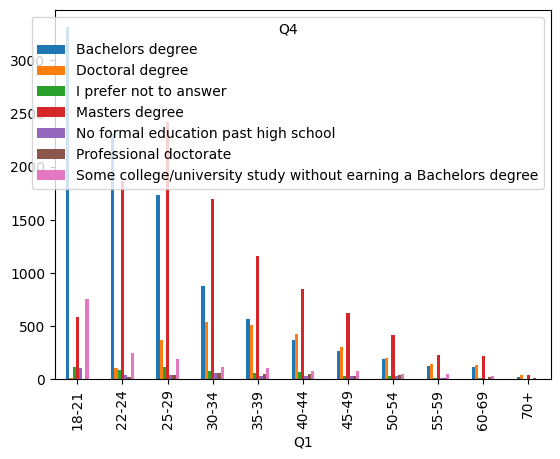

In [ ]:

grouped_counts = df.groupby('Q1')['Q4'].value_counts().unstack()


grouped_counts.plot(kind='bar')
plt.show()

In [ ]:
cross_tab = pd.crosstab(df['Q10'], df['Q18'])
print(cross_tab)

Q18                                    Amazon Aurora   Amazon DynamoDB   \
Q10                                                                       
1-2 years                                           6                23   
10-20 years                                         1                 5   
2-3 years                                           3                14   
20 or more years                                    0                 1   
3-4 years                                           8                 6   
4-5 years                                           3                 3   
5-10 years                                          4                10   
I do not use machine learning methods               4                 4   
Under 1 year                                        5                11   

Q18                                    Amazon RDS   Amazon Redshift   \
Q10                                                                    
1-2 years                     

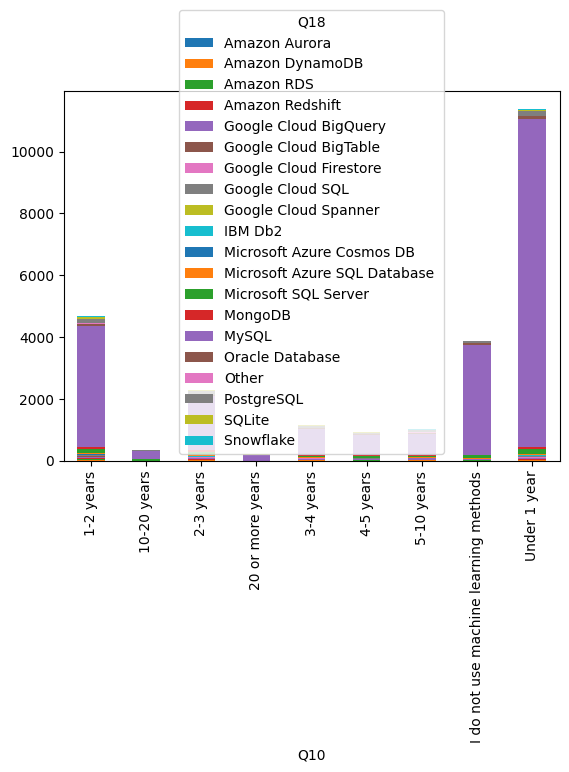

In [ ]:
#Stacked Bar Plot
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.sunburst(df, path=['Q1', 'Q2'])
fig.show()

In [ ]:
cross_tab = pd.crosstab(df['Q11'], df['Q19'])
print(cross_tab)

Q19                                     Alteryx   Amazon QuickSight  Domo  \
Q11                                                                         
Academics/Education                            1                  8     2   
Accounting/Finance                             9                  3     1   
Broadcasting/Communications                    1                  0     0   
Computers/Technology                          12                 18     3   
Energy/Mining                                  1                  1     0   
Government/Public Service                      1                  3     1   
Hospitality/Entertainment/Sports               1                  0     0   
Insurance/Risk Assessment                      3                  2     0   
Manufacturing/Fabrication                      2                  1     0   
Marketing/CRM                                  2                  0     0   
Medical/Pharmaceutical                         3                  3     0   

In [ ]:
fig = px.imshow(cross_tab.corr())
fig.show()

In [ ]:

import plotly.graph_objects as go
value_counts = df['Q1'].value_counts()

pie_trace = go.Pie(labels=df['Q1'], values=value_counts)


layout = go.Layout(
    title='Pie Chart'
)


fig = go.Figure(data=[pie_trace], layout=layout)

fig.show()



In [ ]:
import plotly.graph_objects as go
value_counts = df['Q1'].value_counts()

pie_trace = go.Pie(labels=df['Q15'], values=value_counts)


layout = go.Layout(
    title='Pie Chart'
)


fig = go.Figure(data=[pie_trace], layout=layout)

fig.show()


In [ ]:
# Create the data
value_counts = df['Q15'].value_counts()
labels = df['Q4']
values = df['Q4'].value_counts()

# Create the donut trace
donut_trace = go.Pie(
    labels=labels,
    values=values,
    hole=0.6
)

# Create the layout
layout = go.Layout(
    title='Donut Chart'
)

# Create the figure
fig = go.Figure(data=[donut_trace], layout=layout)
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Q11', 'Q19'])
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Q10', 'Q17'])
fig.show()

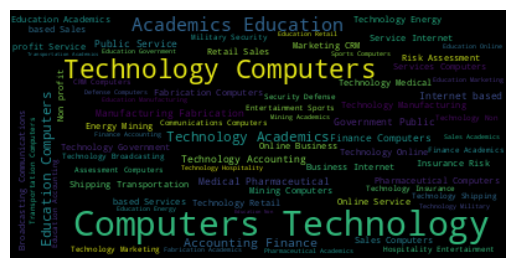

In [ ]:
# Concatenate categories into a single string
text = ' '.join(df['Q11'])

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Plot word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
fig = px.choropleth(df, locations='Q3', locationmode='country names', color='Q4', hover_name='Q3')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Q5', y='Q6', z='Q7', color='Q5')
fig.show()